<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## GeostatsPy Well-documented Demonstration Workflows 

### Categorical Indicator Kriging

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

This is a tutorial for / demonstration of **Categorical Indicator Simulation** with GeostatsPy for estimating spatial cetegorical features, e.g., like facies. 

* specifically we use kriging to make estimates on a grid to display as a map.

**YouTube Lecture**: check out my lectures on:

* [Kriging](https://youtu.be/CVkmuwF8cJ8?si=TzwmoF7QtppoITOv). 
* [Indicator Methods and Indicator Kriging](https://youtu.be/6mCfgbh7f2g?si=Rr6PcAbBgvhltCH-). 

For your convenience here's a summary of salient points.

Kriging is the geostatistical workhorse for:

1. Prediction away from wells, e.g. pre-sample assessments, interpolation and extrapolation.
2. Spatial cross validation.
3. Spatial uncertainty modeling.

First let's explain the concept of spatial estimation.

#### Spatial Estimation

Consider the case of making an estimate at some unsampled location, $𝑧(\bf{u}_0)$, where $z$ is the property of interest (e.g. porosity etc.) and $𝐮_0$ is a location vector describing the unsampled location.

How would you do this given data, $𝑧(\bf{𝐮}_1)$, $𝑧(\bf{𝐮}_2)$, and $𝑧(\bf{𝐮}_3)$?

It would be natural to use a set of linear weights to formulate the estimator given the available data.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha})
\end{equation}

We could add an unbiasedness constraint to impose the sum of the weights equal to one.  What we will do is assign the remainder of the weight (one minus the sum of weights) to the global average; therefore, if we have no informative data we will estimate with the global average of the property of interest.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha}) + \left(1-\sum^{n}_{\alpha = 1} \lambda_{\alpha} \right) \overline{z}
\end{equation}

We will make a stationarity assumption, so let's assume that we are working with residuals, $y$. 

\begin{equation}
y^{*}(\bf{u}) = z^{*}(\bf{u}) - \overline{z}(\bf{u})
\end{equation}

If we substitute this form into our estimator the estimator simplifies, since the mean of the residual is zero.

\begin{equation}
y^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} y(\bf{u}_{\alpha})
\end{equation}

while satisfying the unbaisedness constraint.  

#### Kriging

Now the next question is what weights should we use?  

We could use equal weighting, $\lambda = \frac{1}{n}$, and the estimator would be the average of the local data applied for the spatial estimate. This would not be very informative.

We could assign weights considering the spatial context of the data and the estimate:

* **spatial continuity** as quantified by the variogram (and covariance function)
* **redundancy** the degree of spatial continuity between all of the available data with themselves 
* **closeness** the degree of spatial continuity between the avaiable data and the estimation location

The kriging approach accomplishes this, calculating the best linear unbiased weights for the local data to estimate at the unknown location.  The derivation of the kriging system and the resulting linear set of equations is available in the lecture notes.  Furthermore kriging provides a measure of the accuracy of the estimate!  This is the kriging estimation variance (sometimes just called the kriging variance).

\begin{equation}
\sigma^{2}_{E}(\bf{u}) = C(0) - \sum^{n}_{\alpha = 1} \lambda_{\alpha} C(\bf{u}_0 - \bf{u}_{\alpha})
\end{equation}

What is 'best' about this estimate? Kriging estimates are best in that they minimize the above estimation variance. 

#### Properties of Kriging

Here are some important properties of kriging:

* **Exact interpolator** - kriging estimates with the data values at the data locations
* **Kriging variance** can be calculated before getting the sample information, as the kriging estimation variance is not dependent on the values of the data nor the kriging estimate, i.e. the kriging estimator is homoscedastic. 
* **Spatial context** - kriging takes into account, furthermore to the statements on spatial continuity, closeness and redundancy we can state that kriging accounts for the configuration of the data and structural continuity of the variable being estimated.
* **Scale** - kriging may be generalized to account for the support volume of the data and estimate. We will cover this later.
* **Multivariate** - kriging may be generalized to account for multiple secondary data in the spatial estimate with the cokriging system. We will cover this later.
* **Smoothing effect** of kriging can be forecast. We will use this to build stochastic simulations later.

#### Indicator Formalism

Here we use indicator methods to estimate a categorical feature in space, but there are many more aspects of indicator methods that we could cover:

* Estimation and Simulation with categorical variables with explicit control of spatial continuity of each category
* Estimation and simulation with continuous variables with explicit control of the spatial continuity of different magnitudes
* Requires indicator coding of data, a probability coding based on category or threshold
* Requires indicator variograms to describe the spatial continuity.

If $I\{\bf{u} ;z_k \}$ is an indicator for a categorical variable, it is a probability of a realization equal to a category. We define the cateogrical indicator transform as: 

\begin{equation}
I\{\bf{u} ;z_k \} =
\left\{ 
  \begin{array}{ c l }
    1 & \text{if} Z(\bf{u}) = z_k \\
    0 & \text{otherwise}
  \end{array}
\right.
\end{equation}

For example,

* given threshold, $𝑧_2 = 2$, and data at $\bf{ 𝐮 } _1$, $z(\bf{u} _1) = 2$, then $I\{\bf{u}_1 ;z_2 \} = 1$
* given threshold, $𝑧_1 = 1$, and a RV away from data at $\bf{ 𝐮 } _{iy = 10, ix = 5}$, $z(\bf{ 𝐮 } _{iy = 10, ix = 5}) = 0.25$

Now we perform indicator kriging for each category, $z_k$ to estimate the probability of each category at each location.

\begin{equation}
p^*_{IK}(\bf{ u }; k) = \sum_{\alpha = 1}^n \lambda_{\alpha} (k) \cdot I\{\bf{u} ;z_k \} + \left( 1 - \sum_{\alpha = 1}^n \lambda(k) \right) \cdot p(k)
\end{equation}

Normalization to force the results to sum to 1.0 is included for probability closure.

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))  

GeostatsPy version: 0.0.65


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrys for gridded data
import pandas as pd                                           # DataFrames for tabular data
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
import matplotlib as mpl                                      # custom colorbar
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Define Functions

This is a convenience function to add major and minor gridlines and a combine location map and pixelplot that has color maps and color bars to improve plot interpretability.

In [3]:
import matplotlib.ticker as mticker

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  
    
def locpix_colormaps_st(array,xmin,xmax,ymin,ymax,step,vmin,vmax,df,xcol,ycol,vcol,title,xlabel,ylabel,vlabel_loc,vlabel,cmap_loc,cmap):
    xx, yy = np.meshgrid(
        np.arange(xmin, xmax, step), np.arange(ymax, ymin, -1 * step)
    )
    cs = plt.imshow(array,interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = vmin, vmax = vmax,cmap = cmap)
    plt.scatter(df[xcol],df[ycol],s=None,c=df[vcol],marker=None,cmap=cmap_loc,vmin=vmin,vmax=vmax,alpha=0.8,linewidths=0.8,
        edgecolors="black",)
    plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel); plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
    cbar_loc = plt.colorbar(orientation="vertical",pad=0.08,ticks=[0, 1],
            format=mticker.FixedFormatter(['Shale','Sand'])); cbar_loc.set_label(vlabel_loc, rotation=270,labelpad=20)
    cbar = plt.colorbar(cs,orientation="vertical",pad=0.05); cbar.set_label(vlabel, rotation=270,labelpad=20)
    return cs

#### Make Custom Colorbar

We make this colorbar to display our categorical, sand and shale facies.

In [4]:
cmap_facies = mpl.colors.ListedColormap(['grey','gold'])
cmap_facies.set_over('white'); cmap_facies.set_under('white')

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see above) GSLIB executables in this directory or a location identified in the environmental variable *Path*.

In [5]:
#os.chdir("d:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

* note the "fraction_data" variable is an option to random take part of the data (i.e., 1.0 is all data).

    * this is not standard part of spatial estimation, but fewer data is easier to visualize given our grid size (we want multiple cells between the data to see the behavoir away from data)

* note, I often remove unnecessary data table columns. This clarifies workflows and reduces the chance of blunders, e.g., using the wrong column!

In [6]:
# import matplotlib as mpl
# fig, ax = plt.subplots(figsize=(6, 1))
# fig.subplots_adjust(bottom=0.5)



# bounds = [0,0.5,1]
# norm = mpl.colors.BoundaryNorm(bounds, cmap_facies.N)
# cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap_facies,norm=norm,boundaries=[0] + bounds + [13],
#         extend='both',ticks=bounds,spacing='proportional',orientation='horizontal')
# cb2.set_label('Discrete intervals, some other units')
# fig.show()

In [7]:
fraction_data = 0.2                                           # extract a fraction of data for demonstration / faster runs, set to 1.0 for homework

df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv") # load the data from Dr. Pyrcz's GitHub repository

if fraction_data < 1.0:
    df = df.sample(frac = fraction_data,replace = False,random_state = 73073)
df = df.reset_index()
df = df.iloc[:,2:6]                                           # remove unnecessary features

df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records
df.head(n=3)                                                  # we could also use this command for a table preview 

,X,Y,Facies,Porosity
0,280.0,409.0,1.0,0.136716
1,230.0,749.0,1.0,0.204587
2,300.0,500.0,1.0,0.159891


#### Summary Statistics

Let's look at summary statistics for all facies combined:

In [8]:
df.describe().transpose()                          # summary table of all facies combined DataFrame statistics
df_sand.describe().transpose()                     # summary table of sand only DataFrame statistics
df_shale.describe().transpose()                    # summary table of shale only DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
index,30.0,36.833333,21.133538,3.000000,19.750000,34.500000,53.750000,73.000000
X,30.0,505.333333,274.461647,70.000000,260.000000,500.000000,777.500000,990.000000
Y,30.0,399.433333,266.244467,19.000000,204.750000,334.000000,639.000000,999.000000
Facies,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Porosity,30.0,0.095903,0.017411,0.062169,0.088839,0.099708,0.106937,0.122079


#### PDF and CDFs

Let's also look at the distributions, facies PDF and porosity CDF by facies. 

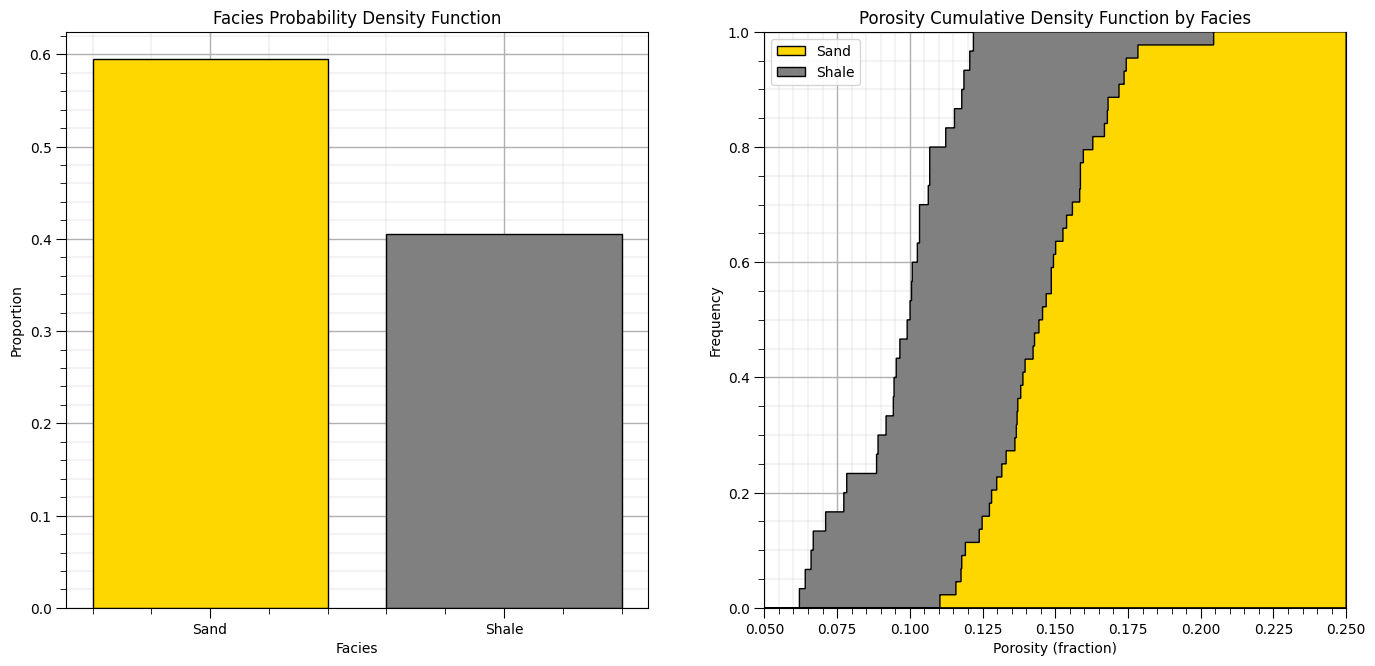

In [9]:
plt.subplot(121)
df['Facies_Names'] = np.where(df['Facies']==0,'Shale','Sand')
facies_counts = df['Facies_Names'].value_counts()/len(df); color = ['gold','grey']
plt.bar(x=['Sand','Shale'],height=facies_counts,color=color,edgecolor='black')
plt.ylabel('Proportion'); plt.xlabel('Facies'); plt.title('Facies Probability Density Function'); add_grid()

plt.subplot(122)                                              # plot original sand and shale porosity histograms
plt.hist(df_sand['Porosity'], facecolor='gold',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=1.0,density=True,cumulative=True,edgecolor='black',label='Sand',zorder=10)
plt.hist(df_shale['Porosity'], facecolor='grey',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=1.0,density=True,cumulative=True,edgecolor='black',label='Shale',zorder=9)
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left'); plt.title('Porosity Cumulative Density Function by Facies'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

For brevity we will omit data declustering from this workflow. We will assume declustered means for the porosity and permeability to apply with simple kriging.

#### Specify the Grid

Let's specify a reasonable grid to the estimation map.

* we balance detail and computation time. Note kriging computation complexity scales $O(n_{cell})$

* so if we half the cell size we have 4 times more grid cells in 2D, 4 times the runtime

In [10]:
xmin = 0.0; xmax = 1000.0                                     # range of x values
ymin = 0.0; ymax = 1000.0                                     # range of y values

xsiz = 10; ysiz = 10                                          # cell size
nx = 100; ny = 100                                            # number of cells
xmn = 5; ymn = 5                                              # grid origin, location center of lower left cell

tmin = -999; tmax = 999;                                      # data trimming limits

pormin = 0.05; pormax = 0.22                                  # set feature min and max for colorbars

#### Location Maps

Let's plot the location maps of facies and porosity.

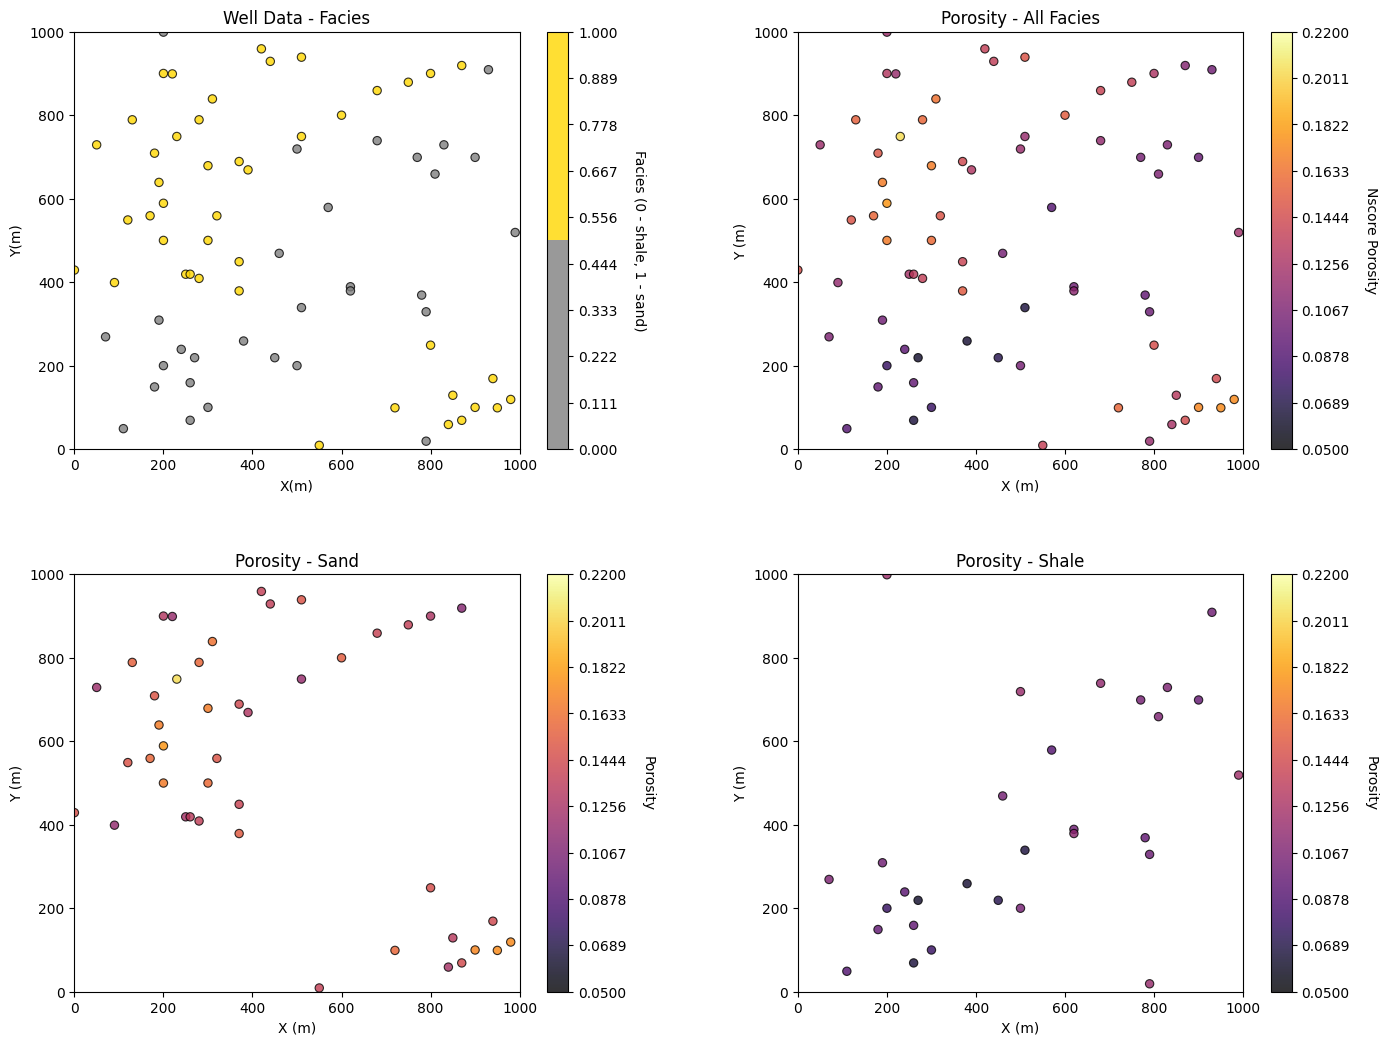

In [11]:
plt.subplot(221)                                              # location map facies 
GSLIB.locmap_st(df,'X','Y','Facies',xmin,xmax,ymin,ymax,0,1,'Well Data - Facies','X(m)','Y(m)',
                'Facies (0 - shale, 1 - sand)',cmap=cmap_facies)

plt.subplot(222)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Porosity - All Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap)

plt.subplot(223)
GSLIB.locmap_st(df_sand,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Porosity - Sand','X (m)','Y (m)',
                'Porosity',cmap)

plt.subplot(224)
GSLIB.locmap_st(df_shale,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Porosity - Shale','X (m)','Y (m)',
                'Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.3, hspace=0.3); plt.show()

#### Indicator Kriging for Facies 

To demonstrate kriging we will assume variogram models, rather than calculate experimental variograms and then model them.  This is for brevity and so we can be free to experiment with different vairogram models to observe the impact on kriging.

Let's first set up the basic indicator kriging parameters:

In [12]:
nxdis = 1; nydis = 1                                          # block kriging discretizations, 1 for point kriging
ndmin = 0; ndmax = 10                                         # minimum and maximum data for kriging 
radius = 500                                                  # maximum search distance
ktype = 0                                                     # kriging type, 0 - simple, 1 - ordinary
ivtype = 0                                                    # variable type, 0 - categorical, 1 - continuous

Now, let's specify the facies categories, global proportions along with the spatial continuity models for both facies.

In [13]:
ncut = 2                                                      # number of facies
thresh = [0,1]                                                # the facies categories
gcdf = [0.4,0.6]                                              # the global proportions of the categories
vrange = 500.0                                                # variogram range
varios = []                                                   # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=vrange,hmin1=vrange)) # shale ind. variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=vrange,hmin1=vrange)) # sand ind. variogram

We are ready to run the indicator kriging with the 2 cateogries (sand and shale) and calculate the probability of sand and shale at all locations and plot the results.

Data for IK3D: Variable column Facies
  Number   = 74
Setting up rotation matrices for variogram and search
Working on the kriging
   currently on estimate 0
   currently on estimate 1000
   currently on estimate 2000
   currently on estimate 3000
   currently on estimate 4000
   currently on estimate 5000
   currently on estimate 6000
   currently on estimate 7000
   currently on estimate 8000
   currently on estimate 9000


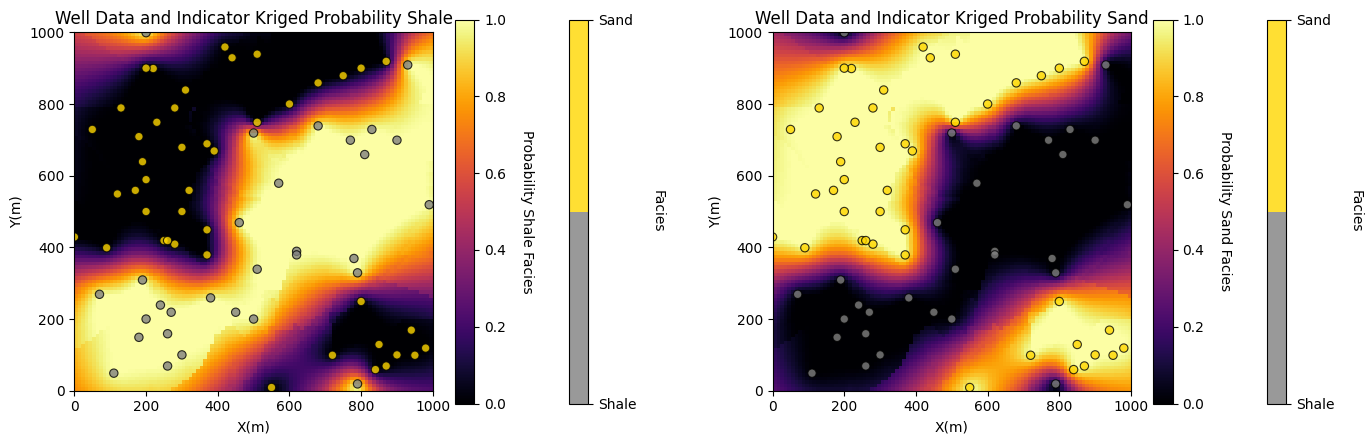

In [14]:
no_trend = np.zeros((1,1))                                    # null ndarray not of correct size so ik2d will not trend
ikmap = geostats.ik2d(df,'X','Y','Facies',ivtype,0,2,thresh,gcdf,no_trend,tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,
                ndmin,ndmax,radius,ktype,vario=varios)

plt.subplot(121) 
locpix_colormaps_st(ikmap[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies',
                'Well Data and Indicator Kriged Probability Shale',
                'X(m)','Y(m)','Facies','Probability Shale Facies',cmap_facies,cmap)
plt.subplot(122) 
locpix_colormaps_st(ikmap[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies',
                'Well Data and Indicator Kriged Probability Sand',
                'X(m)','Y(m)','Facies','Probability Sand Facies',cmap_facies,cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.2); plt.show()

The results are quite interesting.  With the use of ordinary kriging we are able to handle the nonstationarity in the sand a shale data.  See how the probability remains consistent away from data in locations with consistent facies. 

* For a surprising result, switch to simple kriging. We are actually using quite a short variogram range and we see the global proportions away from the data!

#### By-facies Kriging for Porosity

Now let's try some kriging with the continuous properties. For this workflow we will demonstrate a cookie-cutter approach.  The steps are:

1. model the facies, sand and shale, probabilities with indicator kriging
2. model the porosity for sand and shale separately and exhaustively, i.e. at all locations in the model
3. model the permeability for sand and shale separately and exhaustively, i.e. at all locations in the model
4. assign sand and shale locations based on the probabilities from step 1 
5. combine the porosity and permeability from sand and shale regions together

Limitations of this Workflow:

* kriging is too smooth, the spatial continuity is too high
* kriging does not reproduce the continuous property distributions
* we are not accounting for the correlation between porosity and permeability 

We will correct these issues when we perform simulation later.

We need to add a couple of parameters and assume a porosity variogram model.


In [15]:
no_trend = np.zeros((1,1))                                    # null ndarray not of correct size so ik2d will not trend
skmean_por = 0.10; skmean_perm = 65.0                         # simple kriging mean (if simple kriging is selected below)
ktype = 0                                                     # kriging type, 0 - simple, 1 - ordinary
radius = 300                                                  # search radius for neighbouring data
nxdis = 1; nydis = 1                                          # number of grid discretizations for block kriging
ndmin = 0; ndmax = 20                                         # minimum and maximum data for an estimate
tmin = 0.0                                                    # minimum property value
por_vrange = 300                                              # porosity variogram range
por_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=45,hmaj1=por_vrange,hmin1=por_vrange) # por. variogram

Let's start with spatial estimates of porosity and permeability with all facies combined. We will also look at the kriging estimation variance.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.53it/s]


  Estimated   10000 blocks 
      average   0.11816205818685757  variance  0.0006010491049872006


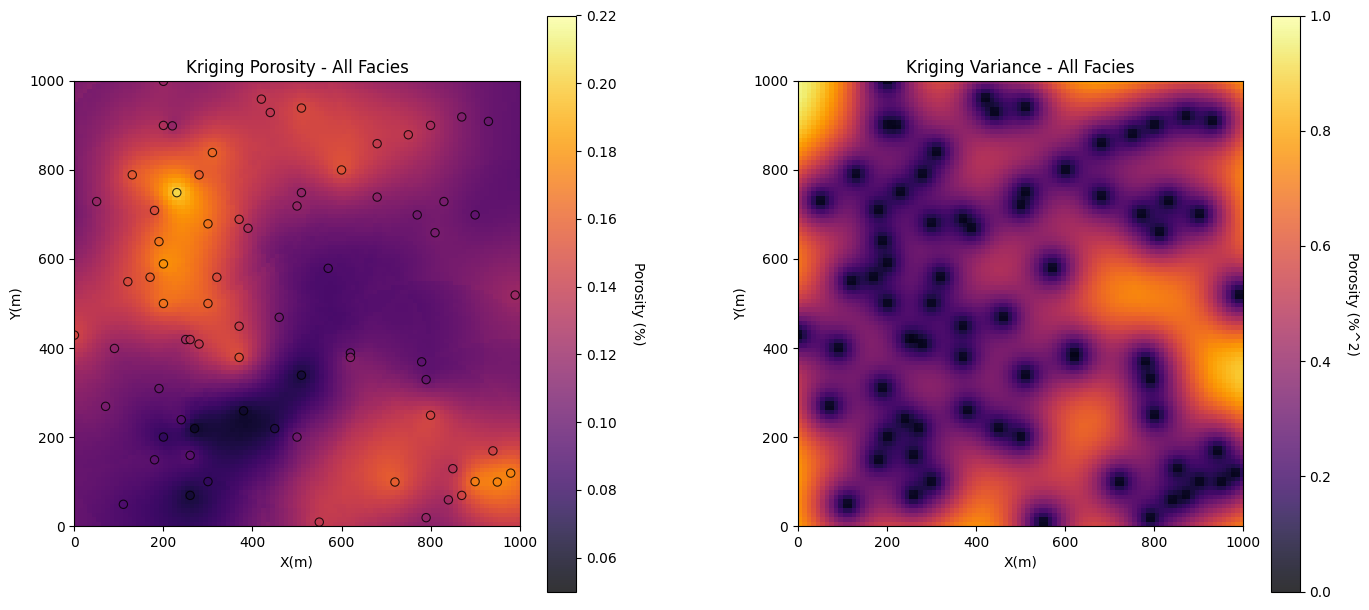

In [16]:
por_kmap, por_vmap = geostats.kb2d(df,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por,por_vario)

plt.subplot(121)
GSLIB.locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Kriging Porosity - All Facies',
                'X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(por_vmap,xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Kriging Variance - All Facies','X(m)','Y(m)',
                  'Porosity (%^2)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.3, hspace=0.3); plt.show()

The results look good. 

Now let's build spatial estimation models for sand and shale separately. Now we need variograms for sand and shale separately, along with the declustered global means if simple kriging is used.

In [17]:
skmean_por_sand = 0.10; skmean_por_shale = 0.08
skmean_perm_sand = 3.0; skmean_perm_shale = 0.5

por_sand_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=500,hmin1=500) # porosity sand variogram
por_shale_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=500,hmin1=500) # porosity shale variogram

facies_kmap = np.zeros((ny,nx)); por_kmap = np.zeros((ny,nx)); perm_kmap = np.zeros((ny,nx)) # declare arrays for results

We are now ready to run these models, by-facies and visualize the results.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 30.07it/s]


  Estimated   10000 blocks 
      average   0.1304770557131778  variance  0.0003196135238544076


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 46.19it/s]


  Estimated   10000 blocks 
      average   0.09894517270299366  variance  0.00012543322496455858


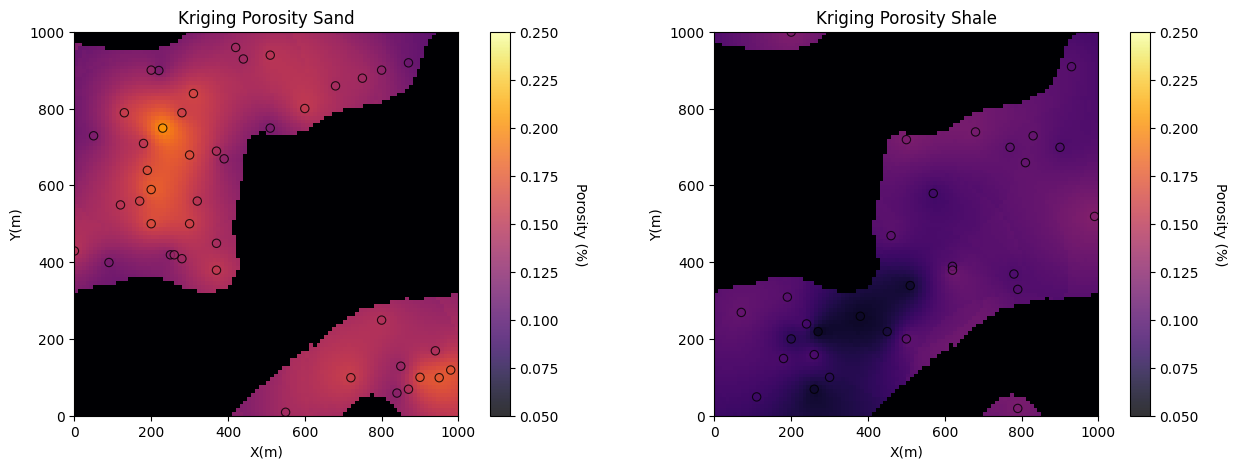

In [18]:
por_sand_kmap, por_sand_vmap = geostats.kb2d(df_sand,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por_sand,por_sand_vario) # sand porosity kriging
por_shale_kmap, por_shale_vmap = geostats.kb2d(df_shale,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,skmean_por_shale,por_shale_vario) # shale porosity kriging

for iy in range(0,ny):                                        # cookie cutter approach, assume most likely facies
    for ix in range(0,nx):
        if ikmap[iy,ix,1] > 0.5:   # current location is assumed to be sand
            facies_kmap[iy,ix] = 1
            por_kmap[iy,ix] = por_sand_kmap[iy,ix];
            por_shale_kmap[iy,ix] = -1
        else:                      # current location is assumed to be shale
            facies_kmap[iy,ix] = 0
            por_kmap[iy,ix] = por_shale_kmap[iy,ix];
            por_sand_kmap[iy,ix] = -1

plt.subplot(121)                                              # plot porosity estimates in sand          
GSLIB.locpix_st(por_sand_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df_sand,'X','Y','Porosity','Kriging Porosity Sand',
                'X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(122)                                              # plot porosity estimates in shale
GSLIB.locpix_st(por_shale_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df_shale,'X','Y','Porosity','Kriging Porosity Shale',
                'X(m)','Y(m)','Porosity (%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.0, hspace=0.3); plt.show()

Now let's visualize the estimation models for porosity and permeability by-facies put together as a single map for each property.

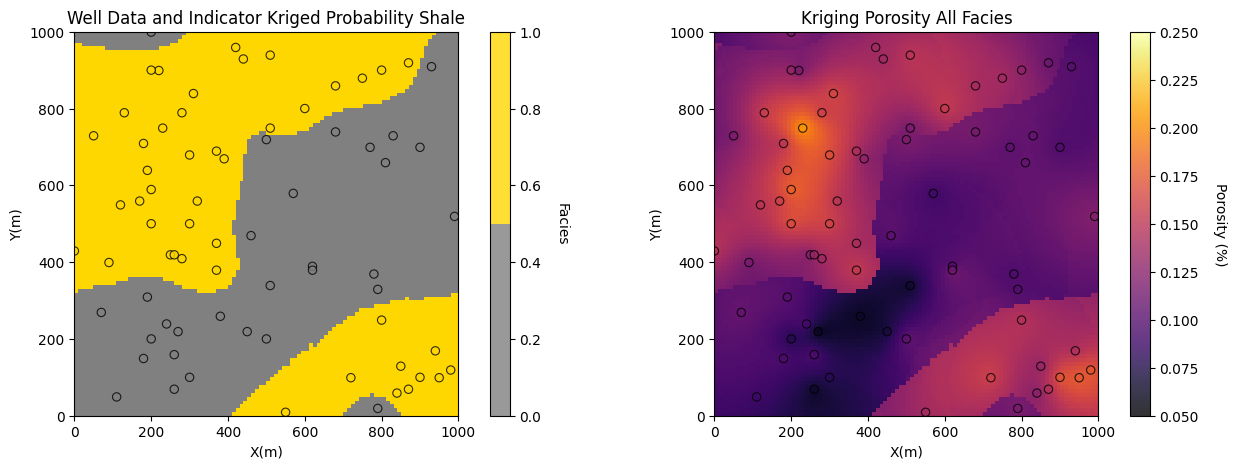

In [19]:
plt.subplot(121)                                              # plot facies estimates
GSLIB.locpix_st(facies_kmap,xmin,xmax,ymin,ymax,xsiz,0.0,1.0,df,'X','Y','Facies',
                'Well Data and Indicator Kriged Probability Shale',
                'X(m)','Y(m)','Facies',cmap_facies)

plt.subplot(122)                                              # plot porosity estimates
GSLIB.locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity',
                'Kriging Porosity All Facies','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.0, hspace=0.3); plt.show()

#### Comments

This was a basic demonstration of indicator kriging for categorical spatial estimation and continuous estimation by spatial category with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  